In [3]:
#importing necessary libraries

#File handling
import json

#Numerical calculations
import numpy as np
from scipy.stats import skew

#Pandas
import pandas as pd

#Visualization
import pydeck as pdk
import matplotlib.pyplot as plt
import seaborn as sns

DATA EXTRACTION

In [4]:
#Loading json file
path = r"C:\Users\abina\Desktop\abi\final project files\capstone 3\sample_airbnb.json"
D = open(path,'r')
data = json.load(D)

In [5]:
#Property Data

#Creating dictionaries
property_data = { 'property_id':[], 'property_name' : [], 'property_type':[], 'host_id': [], 'country':[], 'market' : [],
'price':[], 'accommodates': [], 'bedrooms': [], 'beds':[]}

prop_detail = {'property_id':[], 'property_name':[], 'host_id':[], 'host_name':[], 'property_type': [], 
'description':[], 'transit':[], 'neighborhood_overview':[], 'accommodates': [], 'bedrooms': [], 'room_type':[],
 'beds':[], 'bed_type':[], 'bathrooms':[], 'amenities':[], 'house_rules':[], 'notes':[], 'minimum_nights':[], 
 'maximum_nights':[], 'price':[], 'cancellation_policy':[], 'guests_included':[],  'picture_url':[] }



#Collecting data and assigning to dictionaries
for item in data:
    property_id= item['_id']
    property_name = item['name']
    description = item['description']
    neighborhood_overview = item['neighborhood_overview']
    notes = item['notes']
    transit = item['transit']
    house_rules = item['house_rules']
    property_type = item['property_type']
    room_type = item['room_type']
    bed_type = item['bed_type']
    minimum_nights = item['minimum_nights']
    maximum_nights = item['maximum_nights']
    cancellation_policy = item['cancellation_policy']
    accommodates = item['accommodates']
    bedrooms = item['bedrooms'] if 'bedrooms' in item else np.nan
    bathrooms = item['bathrooms'] if 'bathrooms' in item else np.nan
    beds = item['beds'] if 'beds' in item else 0
    amenities = ','.join(map(str,item['amenities']))
    price = item['price']
    guests_included = item['guests_included']
    picture_url = item['images']['picture_url']
    host_id = item['host']['host_id']
    host_name = item['host']['host_name']
    host_is_superhost = item['host']['host_is_superhost']
    address = item['address']['street']
    country = item['address']['country']
    country_code = item['address']['country_code']
    market = item['address']['market']

    #Assigning values to property_data distionary
    property_data['property_id'].append(property_id)
    property_data['property_name'].append(property_name)
    property_data['property_type'].append(property_type)
    property_data['accommodates'].append(accommodates)
    property_data['bedrooms'].append(bedrooms)
    property_data['beds'].append(beds)
    property_data['price'].append(price)
    property_data['host_id'].append(host_id)
    property_data['country'].append(country)
    property_data['market'].append(market)
    

    #Assigning values to proper_details dictionary
    prop_detail['property_id'].append(property_id)
    prop_detail['property_name'].append(property_name)
    prop_detail['property_type'].append(property_type)
    prop_detail['description'].append(description)
    prop_detail['neighborhood_overview'].append(neighborhood_overview)
    prop_detail['notes'].append(notes)
    prop_detail['transit'].append(transit)
    prop_detail['house_rules'].append(house_rules)
    prop_detail['room_type'].append(room_type)
    prop_detail['bed_type'].append(bed_type)
    prop_detail['minimum_nights'].append(minimum_nights)
    prop_detail['maximum_nights'].append(maximum_nights)
    prop_detail['cancellation_policy'].append(cancellation_policy)
    prop_detail['accommodates'].append(accommodates)
    prop_detail['bedrooms'].append(bedrooms)
    prop_detail['bathrooms'].append(bathrooms)
    prop_detail['beds'].append(beds)
    prop_detail['amenities'].append(amenities)
    prop_detail['price'].append(price)
    prop_detail['guests_included'].append(guests_included)
    prop_detail['picture_url'].append(picture_url)
    prop_detail['host_id'].append(host_id)
    prop_detail['host_name'].append(host_name)


#Converting dictionaries to Dataframe
df_prop_data = pd.DataFrame(property_data)
df_prop_detail = pd.DataFrame(prop_detail)

In [6]:
#Host Data

#Creating host dictionary
host_data = {'host_id':[], 'host_name':[], 'host_response_time': [], 'host_is_superhost':[], 'host_identity_verified':[], 'host_listings_count':[], 'host_country':[] }

#Collecting host details
for item in data:
    host_id = item['host']['host_id']
    host_name = item['host']['host_name']
    host_response_time = item['host']['host_response_time'] if 'host_response_time' in item['host'] else "Unavailable"
    host_is_superhost = item['host']['host_is_superhost']
    host_identity_verified = item['host']['host_identity_verified']
    host_listings_count = item['host']['host_listings_count']
    host_country = item['address']['country']

    #Assigning values to host_data dictionary
    host_data['host_id'].append(host_id)
    host_data['host_name'].append(host_name)
    host_data['host_response_time'].append(host_response_time)
    host_data['host_listings_count'].append(host_listings_count)
    host_data['host_country'].append(host_country)
    if host_is_superhost:
        host_data['host_is_superhost'].append('Super Host')
    else:
        host_data['host_is_superhost'].append('No')

    if host_identity_verified == True:
        host_data['host_identity_verified'].append("Yes")
    else:
        host_data['host_identity_verified'].append("No")

#Converting host_data dictionary to Dataframe
df_host_data = pd.DataFrame(host_data)
    


In [7]:
#Property Location Data

#Creating dictionary
prop_location = {'property_id':[], 'latitude':[], 'longitude':[], 'country':[], 'country_code':[], 'address': []}

#Collectiong data and assigning to dictionary
for item in data:
    property_id= item['_id']
    address = item['address']['street']
    country = item['address']['country']
    country_code = item['address']['country_code']
    latitude = item['address']['location']['coordinates'][1]
    longitude = item['address']['location']['coordinates'][0]

    #Assigning values to prop_location dictionary
    prop_location['property_id'].append(property_id)
    prop_location['address'].append(address)
    prop_location['country'].append(country)
    prop_location['country_code'].append(country_code)
    prop_location['latitude'].append(latitude)
    prop_location['longitude'].append(longitude)

    
#Converting dictionary to Dataframe
df_prop_location = pd.DataFrame(prop_location)

In [8]:
#Property Review Scores Data

#Creating dictionary
prop_review_scores = {'property_id':[], 'accuracy':[], 'cleanliness':[], 'checkin':[], 'communication':[], 'location':[], 'value':[], 'rating':[]}

#Collecting review scores data
for item in data:
    property_id= item['_id']
    accuracy = item['review_scores']['review_scores_accuracy'] if 'review_scores_accuracy' in item['review_scores'] else np.nan
    cleanliness = item['review_scores']['review_scores_cleanliness'] if 'review_scores_cleanliness' in item['review_scores'] else np.nan
    checkin = item['review_scores']['review_scores_checkin'] if 'review_scores_checkin' in item['review_scores'] else np.nan
    communication = item['review_scores']['review_scores_communication'] if 'review_scores_communication' in item['review_scores'] else np.nan
    location = item['review_scores']['review_scores_location'] if 'review_scores_location' in item['review_scores'] else np.nan
    value = item['review_scores']['review_scores_value'] if 'review_scores_value' in item['review_scores'] else np.nan
    rating = item['review_scores']['review_scores_rating'] if 'review_scores_rating' in item['review_scores'] else np.nan


    #Assigning values to prop_review_scores dictinary
    prop_review_scores['property_id'].append(property_id)
    prop_review_scores['accuracy'].append(accuracy)
    prop_review_scores['cleanliness'].append(cleanliness)
    prop_review_scores['checkin'].append(checkin)
    prop_review_scores['communication'].append(communication)
    prop_review_scores['location'].append(location)
    prop_review_scores['value'].append(value)
    prop_review_scores['rating'].append(rating)

#Converting prop_review_scores dictionary to Dataframe
df_prop_review_scores = pd.DataFrame(prop_review_scores)

DATA CLEANING

In [9]:
#Checking if duplicates are present
df_host_data[df_host_data.duplicated()].count()

host_id                   451
host_name                 451
host_response_time        451
host_is_superhost         451
host_identity_verified    451
host_listings_count       451
host_country              451
dtype: int64

In [10]:
#Droppping duplicates
df_host_data.drop_duplicates(inplace=True,ignore_index=True)

In [11]:
#Checking if missing values are present
df_prop_data.isna().sum()

property_id      0
property_name    0
property_type    0
host_id          0
country          0
market           0
price            0
accommodates     0
bedrooms         5
beds             0
dtype: int64

In [12]:
#Filling missing values
df_prop_data.fillna(value=0,inplace=True)

values = {'bedrooms':0, 'bathrooms':1}
df_prop_detail.fillna(value=values,inplace=True)

df_prop_review_scores.fillna(value=0,inplace=True)

In [13]:
#Casting the datatypes of columns
df_prop_data = df_prop_data.astype({'bedrooms':'int64'})
df_prop_detail = df_prop_detail.astype({'bedrooms':'int64','bathrooms':'int64','guests_included':'int64'})

In [14]:
#Replacing unwanted market values
df_prop_data.replace({'market':['Oahu','The Big Island', 'Maui', 'Kauai']},value='Hawaii',inplace=True)
df_prop_data.replace(to_replace='Other (Domestic)', value='Hawaii', inplace=True)
df_prop_data.loc[2945,'market']= 'Porto'
df_prop_data.loc[3949,'market']= 'Istanbul'
df_prop_data.replace(to_replace='Other (International)', value='Rio De Janeiro', inplace=True)
df_prop_data.loc[597,'market']= 'Sydney'
df_prop_data.loc[617,'market']= 'New York'
df_prop_data.loc[639,'market']= 'Rio de Janeiro'
df_prop_data.loc[656,'market']= 'Montreal'
df_prop_data.loc[788,'market']= 'Barcelona'
df_prop_data.loc[836,'market']= 'Hawaii'

df_host_data.replace(to_replace=0,value=1,inplace=True)

EXPLORATORY DATA ANALYSIS

UNIVARIATE ANALYSIS ON PRICE FEATURE

In [15]:
#Statistical analysis
array = df_prop_data['price'].values
print('Mean', np.mean(array))
print('Median', np.median(array))
range = np.max(array) - np.min(array)
print('Range', range)
print('Skewness', skew(array))

Mean 278.76615661566154
Median 129.0
Range 48833.0
Skewness 37.15833332448335


<Axes: ylabel='Density'>

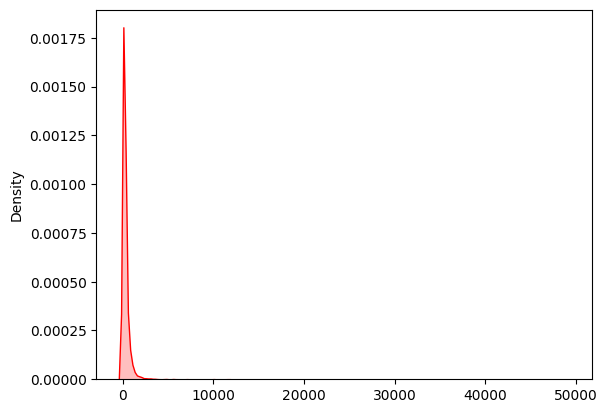

In [16]:
#Kernel Density Plot
sns.kdeplot(array, color='red', fill=True)

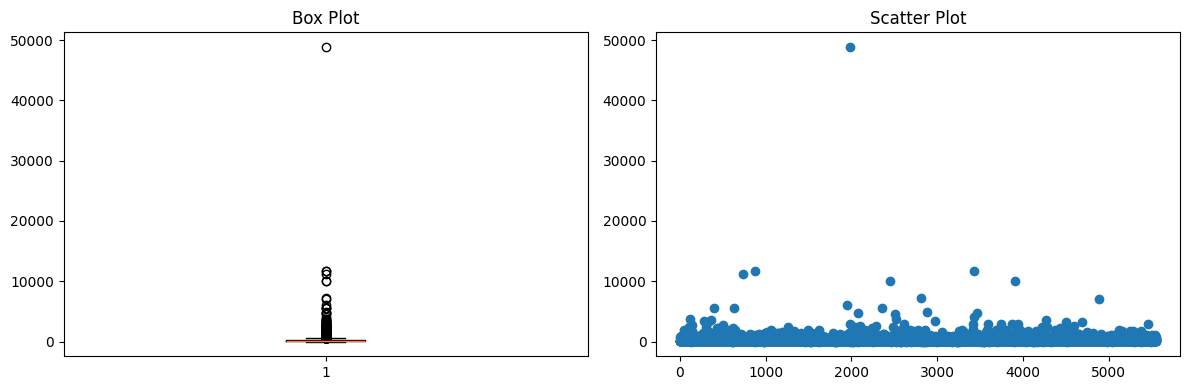

In [17]:
# Plot box plot
plt.figure(figsize=(12, 4))
plt.subplot(121)
plt.boxplot(array)
plt.title('Box Plot')

# Create a scatter plot
plt.subplot(122)
plt.scatter(df_prop_data.index, df_prop_data['price'])
plt.title('Scatter Plot')

plt.tight_layout()
plt.show()

In [18]:
#Outlier detection
q1 = np.percentile(array, 25)
q3 = np.percentile(array, 75)

iqr = q3 - q1
threshold = 1.5 * iqr

lower_bound = q1 - threshold
upper_bound = q3 + threshold

# Identify outliers
outliers = [x for x in array if x < lower_bound or x > upper_bound]

# Print the outliers
print(len(outliers))
print("Outliers:", sorted(outliers,reverse=True))

570
Outliers: [48842.0, 11681.0, 11681.0, 11190.0, 10001.0, 10001.0, 7203.0, 7002.0, 6002.0, 5595.0, 5595.0, 5502.0, 4828.0, 4761.0, 4745.0, 4498.0, 4103.0, 3730.0, 3726.0, 3544.0, 3544.0, 3499.0, 3399.0, 3301.0, 3253.0, 3250.0, 3000.0, 2999.0, 2999.0, 2999.0, 2999.0, 2999.0, 2979.0, 2974.0, 2802.0, 2748.0, 2700.0, 2661.0, 2636.0, 2611.0, 2499.0, 2499.0, 2496.0, 2496.0, 2496.0, 2450.0, 2378.0, 2356.0, 2301.0, 2300.0, 2292.0, 2238.0, 2201.0, 2083.0, 2060.0, 2007.0, 2002.0, 2002.0, 2002.0, 2000.0, 2000.0, 1999.0, 1999.0, 1999.0, 1999.0, 1999.0, 1999.0, 1994.0, 1978.0, 1963.0, 1947.0, 1900.0, 1891.0, 1865.0, 1865.0, 1865.0, 1865.0, 1853.0, 1802.0, 1798.0, 1790.0, 1782.0, 1751.0, 1751.0, 1746.0, 1719.0, 1703.0, 1701.0, 1701.0, 1701.0, 1698.0, 1680.0, 1680.0, 1660.0, 1601.0, 1601.0, 1600.0, 1586.0, 1562.0, 1550.0, 1529.0, 1529.0, 1515.0, 1500.0, 1500.0, 1499.0, 1499.0, 1499.0, 1499.0, 1499.0, 1499.0, 1499.0, 1492.0, 1492.0, 1484.0, 1484.0, 1444.0, 1399.0, 1397.0, 1397.0, 1389.0, 1382.0, 138

UNIVARIATE ANALYSIS ON PRICE OF NEW YORK MARKET LISTINGS

In [19]:
df1 = df_prop_data[['property_id','market','price']][df_prop_data.market == 'New York']

In [20]:
#Statistical analysis
array1 = df1['price'].values
print('Mean', np.mean(array1))
print('Median', np.median(array1))
range = np.max(array1) - np.min(array1)
print('Range', range)
print('Skewness', skew(array1))

Mean 139.60197368421052
Median 110.0
Range 2434.0
Skewness 9.01367347765586


<Axes: ylabel='Density'>

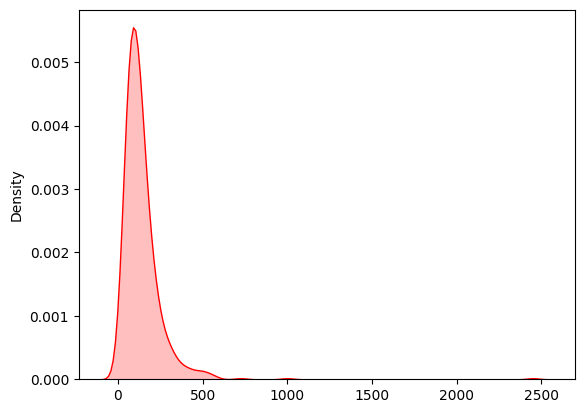

In [21]:
#Kernel Density Plot
sns.kdeplot(array1, color='red', fill=True)

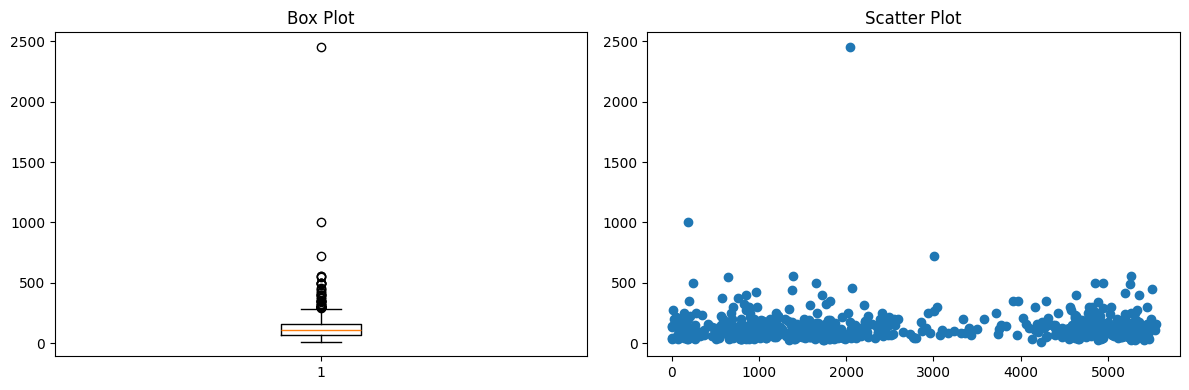

In [22]:
# Plot box plot
plt.figure(figsize=(12, 4))
plt.subplot(121)
plt.boxplot(array1)
plt.title('Box Plot')

# Create a scatter plot
plt.subplot(122)
plt.scatter(df1.index, df1['price'])
plt.title('Scatter Plot')

plt.tight_layout()
plt.show()

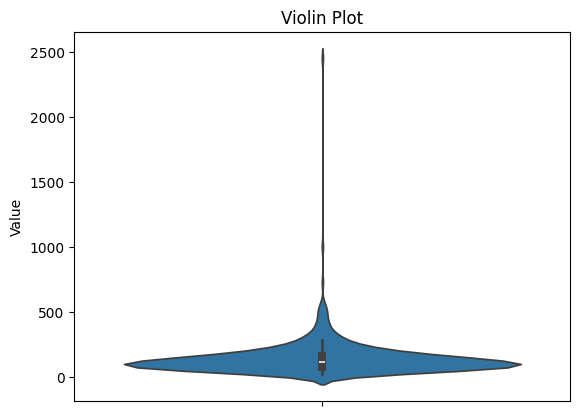

In [23]:
#violin plot
sns.violinplot(data=array1)
plt.title('Violin Plot')
plt.ylabel('Value')
plt.show()

In [24]:
#Outlier detection
q1 = np.percentile(array1, 25)
q3 = np.percentile(array1, 75)

iqr = q3 - q1
threshold = 1.5 * iqr

lower_bound = q1 - threshold
upper_bound = q3 + threshold

# Identify outliers
outliers = [x for x in array1 if x < lower_bound or x > upper_bound]

# Print the outliers
print(len(outliers))
print("Outliers:", sorted(outliers,reverse=True))

44
Outliers: [2450.0, 1000.0, 725.0, 560.0, 555.0, 550.0, 500.0, 500.0, 500.0, 499.0, 495.0, 459.0, 450.0, 439.0, 429.0, 420.0, 400.0, 400.0, 400.0, 399.0, 375.0, 375.0, 350.0, 350.0, 350.0, 350.0, 350.0, 341.0, 330.0, 325.0, 320.0, 315.0, 305.0, 300.0, 300.0, 300.0, 300.0, 300.0, 300.0, 300.0, 299.0, 299.0, 299.0, 295.0]


BI VARIATE ANALYSIS ON PRICE AND NUMBER OF BEDROOMS FEATURES

In [25]:
df2=df_prop_data[['price','bedrooms','country']]

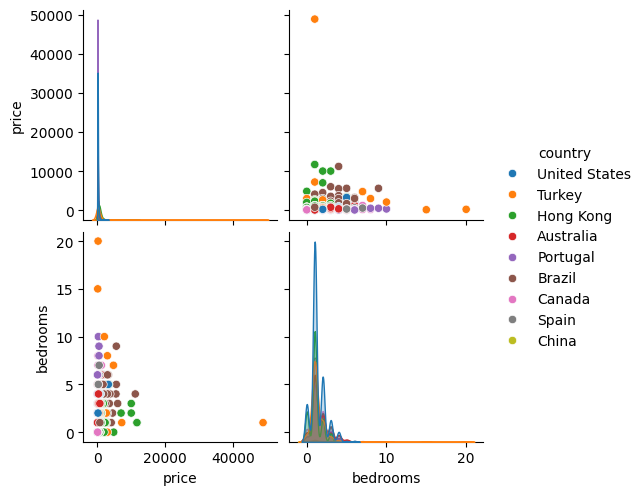

In [26]:
#Pairplot
sns.pairplot(df2,hue='country')
plt.show()

MULTI VARIATE ANALYSIS ON PRICE, NUMBER OF BEDROOMS, ACCOMMODATES FEATURES

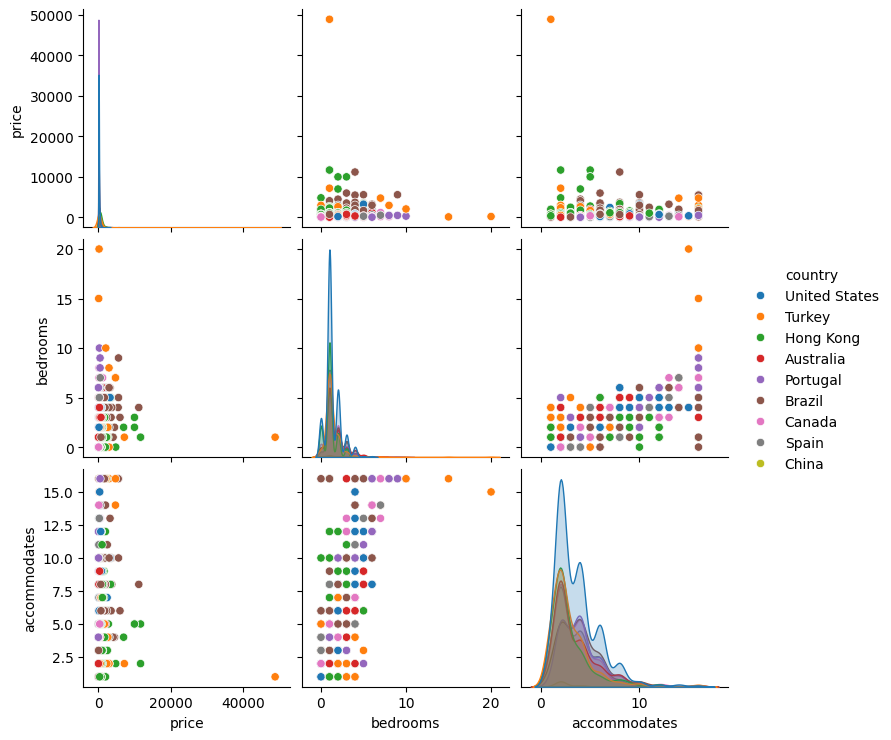

In [28]:
#multivariate scatter plot showing different countries
df3=df_prop_data[['price','bedrooms','accommodates','country']]

sns.pairplot(df3,hue='country')
plt.show()

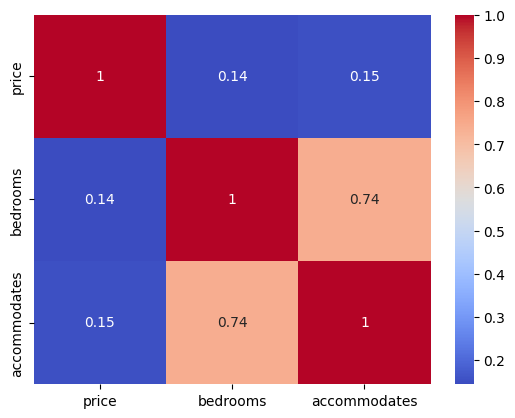

In [29]:
#heatmap
numeric_data = df3.drop(columns=['country'])

correlation_matrix = numeric_data.corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

CSV FILE CREATIONS FOR POWER BI VISUALIZATION

In [32]:
df_host_data.to_csv("host data.csv",index=False,header=["Host ID","Host Name","Response Time","Super Host","Verification Status","Number of listings","Country"])

In [33]:
df_prop_data.to_csv("property data.csv", index=False, header=['Property ID','Property Name','Type of property','Host ID','Country','Market','Price','Accomodates','Bedrooms','Beds'])

In [34]:
df_prop_review_scores.to_csv("property rating.csv", index=False, header=['Property ID','Accuracy','Cleanliness','Checkin','Communication','Location','Value','Rating'])

In [35]:
df_prop_location.to_csv("location.csv", index=False, header=['Property ID','Latitude','Longitude','Country','Country Code','Address'])